In [2]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 확률분포의 종류
- 이항분포
      binom
- 다항분포
      multinomial
- 정규분포
      norm
- 균일분포
      uniform
- 베타분포
      beta
- 감마분포
      gamma
- t - 분포
      t
- 카이제곱분포
      chi2

## 모수 지정
평균, 편차

분포의 기대값, 표준편차

      pdf : 확률밀도함수
      pmf : 확률질량함수
      cdf : 누적확률밀도함수
      ppf : cdf의 역함수

In [3]:
import scipy as sp
import scipy.stats
import numpy as np
rv = scipy.stats.norm(1, 2)

In [4]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

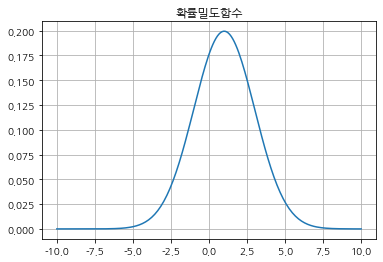

In [5]:
x = np.linspace(-10, 10, 200)
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.title('확률밀도함수')
plt.grid()
plt.show()

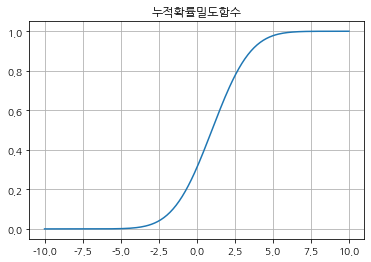

In [6]:
cdf = rv.cdf(x)
plt.plot(x, cdf)
plt.title('누적확률밀도함수')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


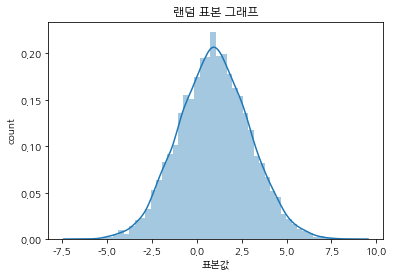

In [7]:
# random value sampling
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title('랜덤 표본 그래프')
plt.xlabel('표본값')
plt.ylabel('count')
plt.show()

## 변환 확률 변수의 시뮬레이션

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


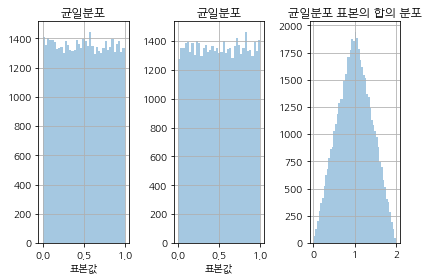

In [8]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)

x_3 = x_1 + x_2

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.grid()
plt.title('균일분포')
plt.xlabel('표본값')

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.grid()
plt.title('균일분포')
plt.xlabel('표본값')

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title('균일분포 표본의 합의 분포')
plt.grid()
plt.tight_layout()
plt.show()

### 베르누이 분포
      bernoulli
      베르누이 실험 : 결과가 두개 밖에 없는 실험(동전)
      베르누이의 확률변수 : 이산확률변수 {0,1}, {-1,1}
$$Bern(x;μ)={μ^x}{(1-μ)^{(1-x)}}$$

In [9]:
mu = 0.6
rv = scipy.stats.bernoulli(mu)
rv

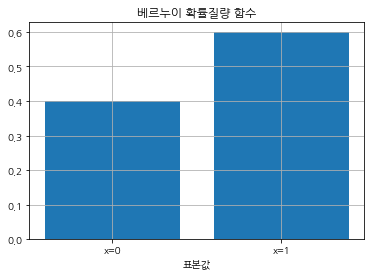

In [10]:
x = [0, 1]
plt.bar(x, rv.pmf(x))
plt.xticks([0,1], ['x=0','x=1'])
plt.grid()
plt.xlabel('표본값')
plt.title('베르누이 확률질량 함수')
plt.show()

In [11]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


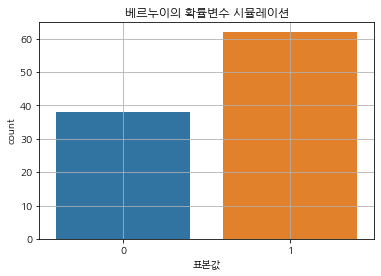

In [12]:
sns.countplot(x)
plt.title('베르누이의 확률변수 시뮬레이션')
plt.xlabel('표본값')
plt.grid()
plt.show()

In [13]:
import pandas as pd
y = np.bincount(x, minlength=2)/float(len(x))
df = pd.DataFrame({'이론':rv.pmf([0,1]), '시뮬레이션' : y})
df.index = [0,1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [14]:
for i in range(200):
  x = rv.rvs(i, random_state=0)
  y = np.bincount(x, minlength=2)/float(len(x))
  print(f'표본 수가 {i}개 일때 이론값 : {rv.pmf([0,1])}, 표본값 : {y}')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


표본 수가 0개 일때 이론값 : [0.4 0.6], 표본값 : [nan nan]
표본 수가 1개 일때 이론값 : [0.4 0.6], 표본값 : [0. 1.]
표본 수가 2개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 3개 일때 이론값 : [0.4 0.6], 표본값 : [0.66666667 0.33333333]
표본 수가 4개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 5개 일때 이론값 : [0.4 0.6], 표본값 : [0.4 0.6]
표본 수가 6개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 7개 일때 이론값 : [0.4 0.6], 표본값 : [0.42857143 0.57142857]
표본 수가 8개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 9개 일때 이론값 : [0.4 0.6], 표본값 : [0.55555556 0.44444444]
표본 수가 10개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 11개 일때 이론값 : [0.4 0.6], 표본값 : [0.54545455 0.45454545]
표본 수가 12개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 13개 일때 이론값 : [0.4 0.6], 표본값 : [0.46153846 0.53846154]
표본 수가 14개 일때 이론값 : [0.4 0.6], 표본값 : [0.5 0.5]
표본 수가 15개 일때 이론값 : [0.4 0.6], 표본값 : [0.46666667 0.53333333]
표본 수가 16개 일때 이론값 : [0.4 0.6], 표본값 : [0.4375 0.5625]
표본 수가 17개 일때 이론값 : [0.4 0.6], 표본값 : [0.41176471 0.58823529]
표본 수가 18개 일때 이론값 : [0.4 0.6], 표본값 : [0.44444444 0.55555556]
표본 수가 19개 일때 이론값 : [